## **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, mean_squared_error,r2_score, roc_auc_score

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

## **Data** **Import**

In [ ]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## **Data** **Analysis**


In [ ]:
# Find number of NULL values for each column
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
#check for any duplicate values in the data
sum(df.duplicated())

0

In [ ]:
# Replacing the NULL values with the median of respective columns

df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].median(), inplace=True)

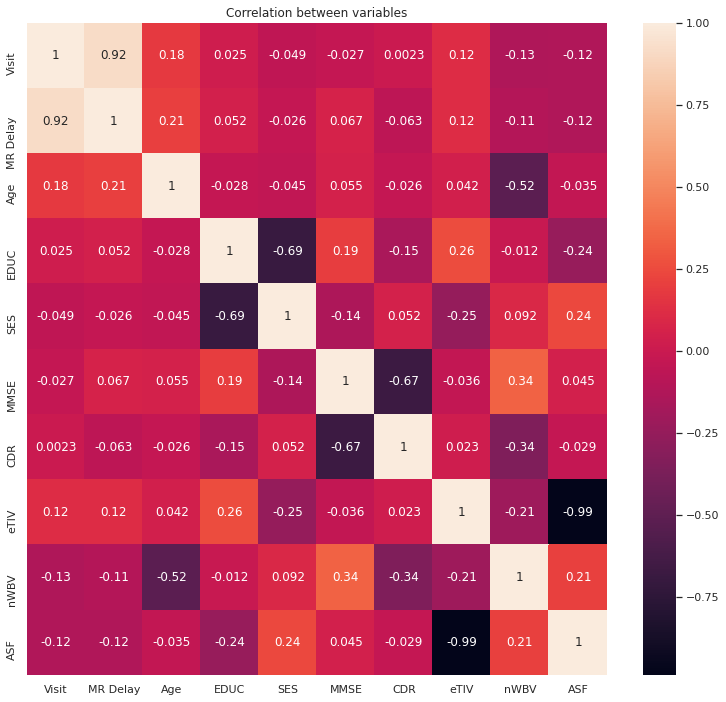

In [ ]:
#correlation between variables
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(13,12)})
sns.heatmap(corrMatrix, annot=True).set_title('Correlation between variables')
plt.show()

In [ ]:
#Converted Group Into Demented
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) 

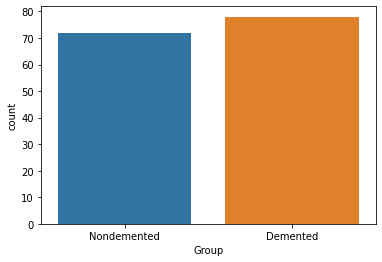

In [ ]:
#No of people with Dementia
#Same person visits two or more time so only take the single visit data

sns.set_style("whitegrid")
sns.reset_orig()
visit_one = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=visit_one)

Bar drawing function to understand relation between Gender and Dementia.

Males are more likely to have dementia than females

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

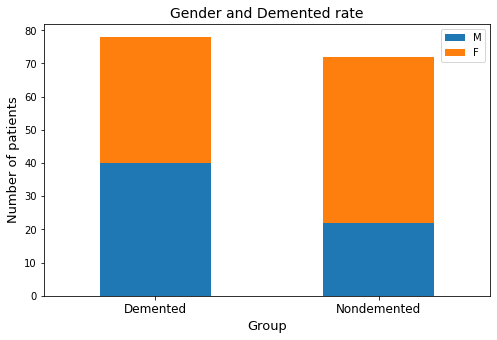

In [ ]:

# bar drawing function
def bar_chart(feature):
    Demented = visit_one[visit_one['Group']=='Demented'][feature].value_counts()
    Nondemented = visit_one[visit_one['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)

bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

* Plot to understand relation between MMSE (Mini Mental State Examination) and Dementia
* Nondemented = 0, Demented =1
* Nondemented has higher test result ranging from 25 to 30.



(15.3, 30.0)

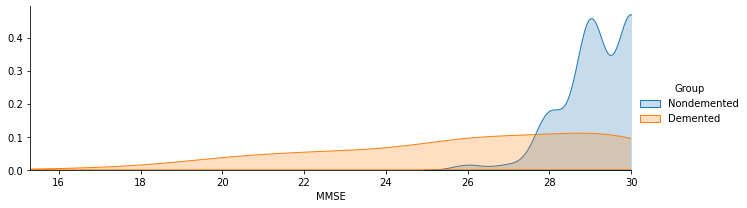

In [ ]:

facet= sns.FacetGrid(visit_one,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

* Various plots to show relation between Brain volumne and Dementia.
* The paramteres used are Atlas Scaling Factor (ASF), Estimated Total Intracranial Volume (eTIV) and Normalized Whole Brain Volume (nWBV)
* Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.




(0.5, 2.0)

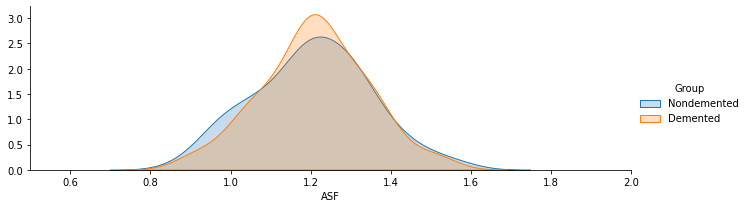

In [ ]:
#ASF = Atlas Scaling Factor

facet= sns.FacetGrid(visit_one,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, visit_one['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)


(900.0, 2100.0)

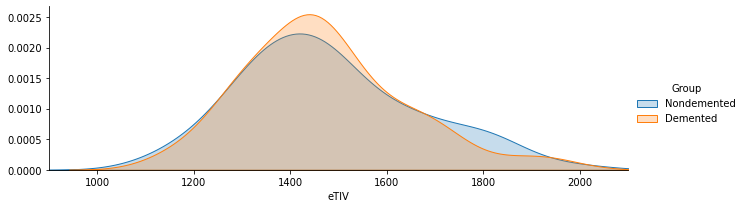

In [ ]:

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(visit_one,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, visit_one['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)


(0.6, 0.9)

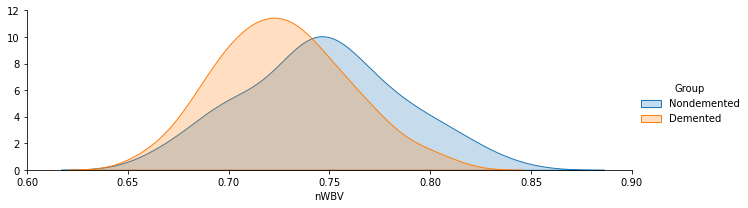

In [ ]:
#'nWBV' = Normalized Whole Brain Volume

facet= sns.FacetGrid(visit_one,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, visit_one['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

* Another important factor to be considered is age of patients 
suffering from Dementia.
* There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. 
* We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(50.0, 100.0)

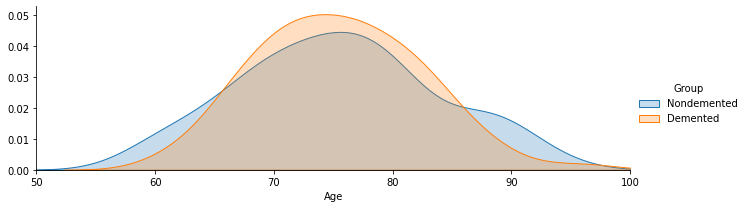

In [ ]:
facet= sns.FacetGrid(visit_one,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, visit_one['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

(0.0, 0.16)

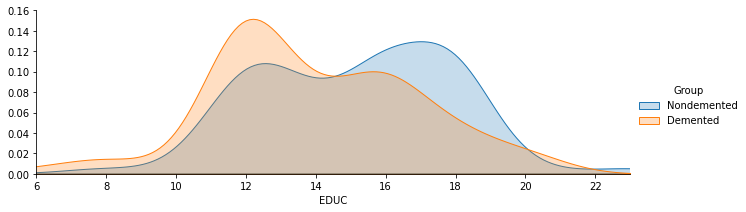

In [ ]:
#'EDUC' = Years of Education

facet= sns.FacetGrid(visit_one,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), visit_one['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

Let's try to find relation between variables and **CDR (Clinical Dementia Rating)** instead of just Dementia/Non-Dementia

* While the Dementia/Non-Dementia classification had relation with age and gender, this direct connection is not found with CDR.

* No obvious connection between Education Level/Social Economic Status and CDR as well.

* while the MMS examination results of objects not diagnosed with Dementia concentrate near 27-30 point rate, MMSE results of objects diagnosed with Dementia seems to be more spreaded. We can see that objects had the highest MMSE score but still have Clinical Dementia Rating of 0.5 or 1. No obvious connection between Estimated total intracranial volume and Demetia Diagnosis.

* Normalized whole-brain volume seems to be more spreded for objects with CDR = 0 and narrows as CDR grows up. No obvious connection between Atlas scaling factor and Demetia Diagnosis.

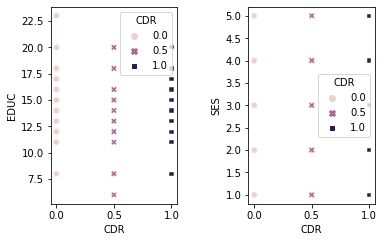

In [ ]:
# Education and Social Status
fig, ax =plt.subplots(1,2)
sns.scatterplot(x='CDR', y='EDUC',style='CDR',hue='CDR', data=visit_one, ax=ax[0])
sns.scatterplot(x='CDR', y='SES',style='CDR',hue='CDR', data=visit_one, ax=ax[1])
fig.tight_layout(pad=3.0)
fig.show()

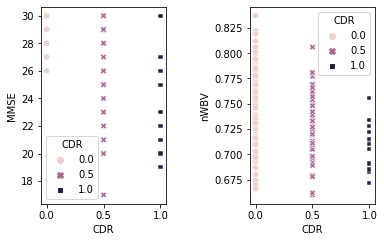

In [ ]:
# Mini Mental State Examination(MMSE) and Normalized Whole Brain Volume (nWBV)
fig, ax =plt.subplots(1,2)
sns.scatterplot(x='CDR', y='MMSE',style='CDR',hue='CDR', data=visit_one, ax=ax[0])
sns.scatterplot(x='CDR', y='nWBV',style='CDR',hue='CDR', data=visit_one, ax=ax[1])
fig.tight_layout(pad=3.0)
fig.show()

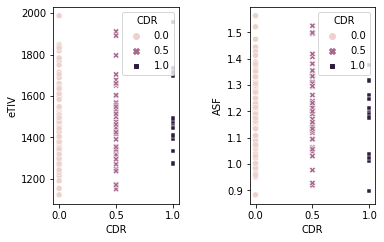

In [ ]:
# Estimated Total Intracranial Volume (eTIV) and Atlas Scaling Factor (ASF)
fig, ax =plt.subplots(1,2)
sns.scatterplot(x='CDR', y='eTIV',style='CDR',hue='CDR', data=visit_one, ax=ax[0])
sns.scatterplot(x='CDR', y='ASF',style='CDR',hue='CDR', data=visit_one, ax=ax[1])
fig.tight_layout(pad=3.0)
fig.show()

## **Classifying Dementia/Non-Dementia**

In [ ]:
visit_one.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,2.0,28.0,0.5,1357,0.748,1.293


In [ ]:

visit_one['M/F'] = visit_one['M/F'].replace(['F','M'], [0,1]) # M/F column
visit_one['Group'] = visit_one['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
visit_one.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,1,1,0,1,R,71,16,2.0,28.0,0.5,1357,0.748,1.293


In [ ]:
#Feature Selection

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = visit_one[feature_col_names].values
y = visit_one[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Various parameters to test the classifier model

In [ ]:
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu



Confusion Matrix:
[[12  6]
 [ 2 10]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.62      0.83      0.71        12

    accuracy                           0.73        30
   macro avg       0.74      0.75      0.73        30
weighted avg       0.76      0.73      0.74        30



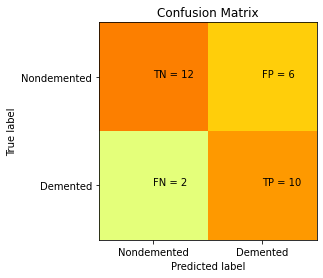

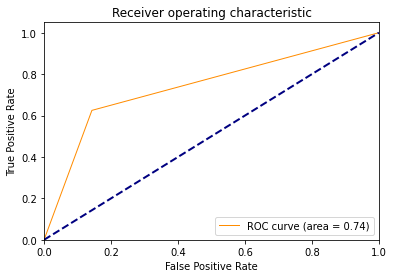


Accuracy Of the Model:  0.7333333333333333 




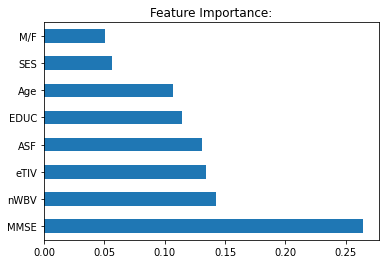

In [ ]:
#Random Forest Classifier

rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}


rfc.fit(X_train, y_train.ravel())

report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()




Confusion Matrix:
[[14  4]
 [ 3  9]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.69      0.75      0.72        12

    accuracy                           0.77        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



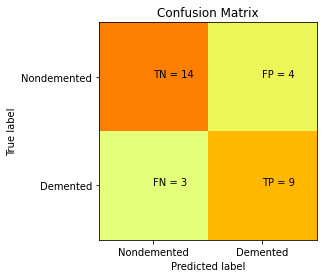

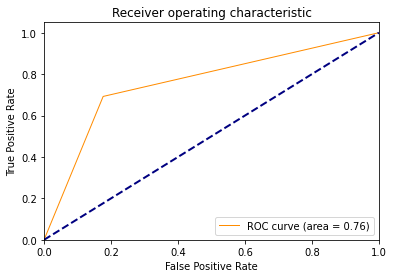


Accuracy Of the Model:  0.7666666666666667 




In [ ]:
#SVM

svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)



Confusion Matrix:
[[11  7]
 [ 2 10]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        18
           1       0.59      0.83      0.69        12

    accuracy                           0.70        30
   macro avg       0.72      0.72      0.70        30
weighted avg       0.74      0.70      0.70        30



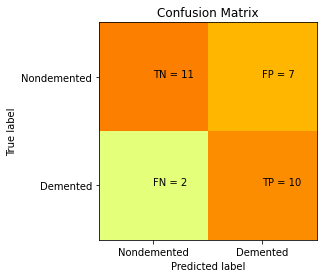

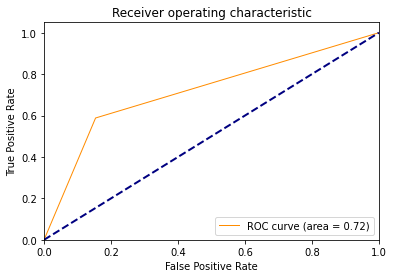


Accuracy Of the Model:  0.7 




In [ ]:
#XGBOOST
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

In [ ]:
def all_roc_curves(model1, model2, model3):
    predictions_test1 = model1.predict(X_test)
    predictions_test2 = model2.predict(X_test)
    predictions_test3 = model3.predict(X_test)

    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    fpr, tpr, _ = roc_curve(y_test,predictions_test1)
    auc = roc_auc_score(y_test, predictions_test1)
    result_table = result_table.append({'classifiers':'Random Forest',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    fpr, tpr, _ = roc_curve(y_test,predictions_test2)
    auc = roc_auc_score(y_test, predictions_test2)
    result_table = result_table.append({'classifiers':'SVM',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    fpr, tpr, _ = roc_curve(y_test,predictions_test3)
    auc = roc_auc_score(y_test, predictions_test3)
    result_table = result_table.append({'classifiers':'XGBoost',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
        
    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()

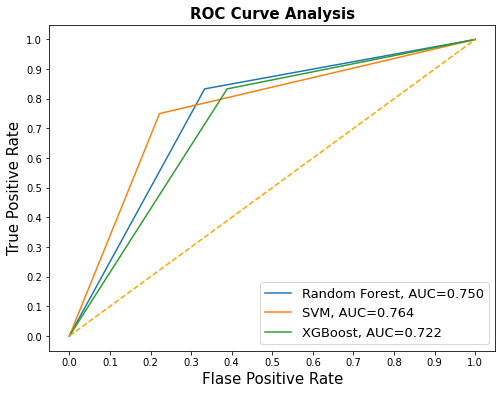

In [ ]:
all_roc_curves(rfc,svm,clf_xgb)

## **Classifying Clinical Dementia Rating (CDR)**

In [ ]:
visit_one.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,1,1,0,1,R,71,16,2.0,28.0,0.5,1357,0.748,1.293


In [ ]:
label_encoder = preprocessing.LabelEncoder()
visit_one['CDR']= label_encoder.fit_transform(visit_one['CDR']) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Feature Selection

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['CDR']

X = visit_one[feature_col_names].values
y = visit_one[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:

def report_performance_cdr(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    print(model_test)
  


total_accuracy = {}
def accuracy_cdr(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu



Confusion Matrix:
[[17  5  0]
 [ 0  5  2]
 [ 0  1  0]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.45      0.71      0.56         7
           2       0.00      0.00      0.00         1

    accuracy                           0.73        30
   macro avg       0.48      0.50      0.48        30
weighted avg       0.84      0.73      0.77        30

[0 1 0 0 0 1 0 1 0 0 0 0 2 1 0 0 0 0 1 2 1 1 0 1 0 1 0 1 0 1]

Acuuracy Of the Model:  0.7333333333333333 




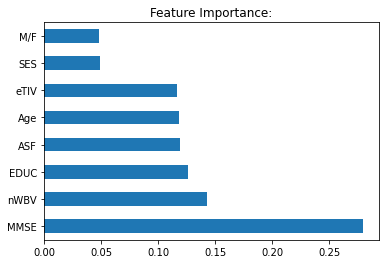

In [ ]:
#Random Forest Classifier

rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}


rfc.fit(X_train, y_train.ravel())

report_performance_cdr(rfc) 

accuracy_cdr(rfc)

feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()


In [ ]:
#SVM

svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance_cdr(svm) 

accuracy_cdr(svm)



Confusion Matrix:
[[17  5  0]
 [ 0  7  0]
 [ 0  1  0]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.54      1.00      0.70         7
           2       0.00      0.00      0.00         1

    accuracy                           0.80        30
   macro avg       0.51      0.59      0.52        30
weighted avg       0.86      0.80      0.80        30

[0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1]

Acuuracy Of the Model:  0.8 




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#XGBOOST
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance_cdr(clf_xgb) 

accuracy_cdr(clf_xgb)



Confusion Matrix:
[[17  5  0]
 [ 0  6  1]
 [ 0  1  0]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.50      0.86      0.63         7
           2       0.00      0.00      0.00         1

    accuracy                           0.77        30
   macro avg       0.50      0.54      0.50        30
weighted avg       0.85      0.77      0.79        30

[0 1 0 0 0 1 0 1 0 0 0 0 2 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1]

Acuuracy Of the Model:  0.7666666666666667 


